<a href="https://colab.research.google.com/github/unclepete-20/lab7-k-means/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio #7 (K-Means)

## Integrantes:


*   Pedro Pablo Arriola Jimenez (20188)
*   Oscar Fernando Lopez Barrios (20679)
*   Santiago Taracena Puga (20017)
*   YongBum Park (20117)








# Introducción a K-Means Clustering para Análisis de Transacciones Bancarias 💳💰

El análisis de transacciones bancarias es una tarea importante para detectar fraudes, comportamientos inusuales y patrones de gasto de los clientes. Una forma de analizar estos datos es mediante el uso de técnicas de agrupamiento, como el algoritmo de K-Means.

El algoritmo de K-Means es una técnica de aprendizaje no supervisado que permite agrupar datos en clusters o grupos, basado en su similitud. En el caso del análisis de transacciones bancarias, se pueden agrupar los datos según el comportamiento de los clientes, como sus patrones de gasto, lugares frecuentes de uso de tarjeta, entre otros.

La implementación de K-Means en Python es relativamente sencilla gracias a la disponibilidad de diversas librerías como scikit-learn y pandas. A través del uso de esta técnica, se puede obtener una mejor comprensión de los patrones y comportamientos de los clientes, lo que puede ser valioso para la toma de decisiones en el ámbito bancario.

En esta investigación, se explorará el uso de K-Means Clustering para el análisis de transacciones bancarias, incluyendo su implementación en Python y la interpretación de los resultados obtenidos.


## Task 1 - Limpieza de datos y Análisis Exploratorio

In [3]:
# Librerías necesarias para la limpieza de datos y análisis exploratorio.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Se carga el dataset para comenzar a realizar limpieza y exploración.
data = pd.read_csv("./data/bank_transactions.csv")
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


La tabla muestra información sobre transacciones financieras. A continuación se describe el significado de cada columna:

- TransactionID: un identificador único para cada transacción
- CustomerID: un identificador único para cada cliente
- CustomerDOB: la fecha de nacimiento del cliente
- CustGender: el género del cliente
- CustLocation: la ubicación geográfica del cliente
- CustAccountBalance: el saldo de la cuenta del cliente
- TransactionDate: la fecha de la transacción
- TransactionTime: la hora de la transacción
- TransactionAmount (INR): la cantidad de la transacción en rupias indias (INR).

Con esta información, se procederá con la limpieza y codificación de los datos.

In [5]:
# Se eliminar estas variables categóricas que no sirven ningún propósito.
data = data.drop(["TransactionID", "CustomerID", "CustomerDOB", "TransactionDate"], axis=1)
data.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,F,JAMSHEDPUR,17819.05,143207,25.0
1,M,JHAJJAR,2270.69,141858,27999.0
2,F,MUMBAI,17874.44,142712,459.0
3,F,MUMBAI,866503.21,142714,2060.0
4,F,NAVI MUMBAI,6714.43,181156,1762.5


In [6]:
# Se hace un mapeo para codificar el genero del cliente

gender_map = {"M": 1, "F": 0}  # Mapeo de género a valores numéricos
data["CustGender"] = data["CustGender"].replace(gender_map)
# Convertimos la columna a valores numéricos
data['CustGender'] = pd.to_numeric(data['CustGender'], errors='coerce')
data

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,JAMSHEDPUR,17819.05,143207,25.0
1,1.0,JHAJJAR,2270.69,141858,27999.0
2,0.0,MUMBAI,17874.44,142712,459.0
3,0.0,MUMBAI,866503.21,142714,2060.0
4,0.0,NAVI MUMBAI,6714.43,181156,1762.5
...,...,...,...,...,...
1048562,1.0,NEW DELHI,7635.19,184824,799.0
1048563,1.0,NASHIK,27311.42,183734,460.0
1048564,1.0,HYDERABAD,221757.06,183313,770.0
1048565,1.0,VISAKHAPATNAM,10117.87,184706,1000.0


In [7]:
# Se eliminan datos faltantes o nulos
data = data.dropna()
data

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,JAMSHEDPUR,17819.05,143207,25.0
1,1.0,JHAJJAR,2270.69,141858,27999.0
2,0.0,MUMBAI,17874.44,142712,459.0
3,0.0,MUMBAI,866503.21,142714,2060.0
4,0.0,NAVI MUMBAI,6714.43,181156,1762.5
...,...,...,...,...,...
1048562,1.0,NEW DELHI,7635.19,184824,799.0
1048563,1.0,NASHIK,27311.42,183734,460.0
1048564,1.0,HYDERABAD,221757.06,183313,770.0
1048565,1.0,VISAKHAPATNAM,10117.87,184706,1000.0


In [8]:
# Escalamiento de la data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[["CustAccountBalance", "TransactionAmount (INR)"]] = scaler.fit_transform(data[["CustAccountBalance", "TransactionAmount (INR)"]])
data

/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_92417/1032417898.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["CustAccountBalance", "TransactionAmount (INR)"]] = scaler.fit_transform(data[["CustAccountBalance", "TransactionAmount (INR)"]])


,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,JAMSHEDPUR,-0.115327,143207,-0.235558
1,1.0,JHAJJAR,-0.133684,141858,4.022106
2,0.0,MUMBAI,-0.115261,142712,-0.169503
3,0.0,MUMBAI,0.886688,142714,0.074170
4,0.0,NAVI MUMBAI,-0.128438,181156,0.028891
...,...,...,...,...,...
1048562,1.0,NEW DELHI,-0.127351,184824,-0.117755
1048563,1.0,NASHIK,-0.104119,183734,-0.169351
1048564,1.0,HYDERABAD,0.125456,183313,-0.122169
1048565,1.0,VISAKHAPATNAM,-0.124419,184706,-0.087162


In [9]:
median_balance = data[["CustAccountBalance"]].median()
fill_median = data[["CustAccountBalance"]].fillna(median_balance)
data.loc[:, "CustAccountBalance"] = fill_median
data

/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_92417/1550592501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "CustAccountBalance"] = fill_median


,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,JAMSHEDPUR,-0.115327,143207,-0.235558
1,1.0,JHAJJAR,-0.133684,141858,4.022106
2,0.0,MUMBAI,-0.115261,142712,-0.169503
3,0.0,MUMBAI,0.886688,142714,0.074170
4,0.0,NAVI MUMBAI,-0.128438,181156,0.028891
...,...,...,...,...,...
1048562,1.0,NEW DELHI,-0.127351,184824,-0.117755
1048563,1.0,NASHIK,-0.104119,183734,-0.169351
1048564,1.0,HYDERABAD,0.125456,183313,-0.122169
1048565,1.0,VISAKHAPATNAM,-0.124419,184706,-0.087162


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.loc[:, "CustLocation"] = le.fit_transform(data["CustLocation"])
data


/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_92417/4219731397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "CustLocation"] = le.fit_transform(data["CustLocation"])
/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_92417/4219731397.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "CustLocation"] = le.fit_transform(data["CustLocation"])


,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,3567,-0.115327,143207,-0.235558
1,1.0,3629,-0.133684,141858,4.022106
2,0.0,5242,-0.115261,142712,-0.169503
3,0.0,5242,0.886688,142714,0.074170
4,0.0,5631,-0.128438,181156,0.028891
...,...,...,...,...,...
1048562,1.0,5766,-0.127351,184824,-0.117755
1048563,1.0,5603,-0.104119,183734,-0.169351
1048564,1.0,3377,0.125456,183313,-0.122169
1048565,1.0,9108,-0.124419,184706,-0.087162


In [11]:
# Ahora se hace una breve descripcion estadistica de los datos
data.describe()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.044946e+06,1.044946e+06,1.044946e+06,1.044946e+06,1.044946e+06
mean,7.308559e-01,4.104684e+03,-3.016393e-17,1.571001e+05,1.332217e-16
std,4.435152e-01,2.377073e+03,1.000000e+00,5.126609e+04,1.000000e+00
min,0.000000e+00,0.000000e+00,-1.363652e-01,0.000000e+00,-2.393632e-01
25%,0.000000e+00,2.062000e+03,-1.307740e-01,1.240330e+05,-2.148589e-01
50%,1.000000e+00,4.101000e+03,-1.165098e-01,1.642360e+05,-1.694239e-01
75%,1.000000e+00,5.766000e+03,-6.823476e-02,2.000160e+05,-5.672226e-02
max,1.000000e+00,9.325000e+03,1.356825e+02,2.359590e+05,2.371992e+02


In [12]:
# Tambien se obtiene un poco sobre la informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044946 entries, 0 to 1048566
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustGender               1044946 non-null  float64
 1   CustLocation             1044946 non-null  int64  
 2   CustAccountBalance       1044946 non-null  float64
 3   TransactionTime          1044946 non-null  int64  
 4   TransactionAmount (INR)  1044946 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 47.8 MB


In [13]:
# Se explora la cantida de ubicaciones para tener una nocion sobre la variable
data.groupby('CustLocation').size()

CustLocation
0       11
1        1
2       21
3        5
4       11
        ..
9321     1
9322     6
9323     4
9324     9
9325     1
Length: 9326, dtype: int64

## Task 1.1 - K-Mean Clustering

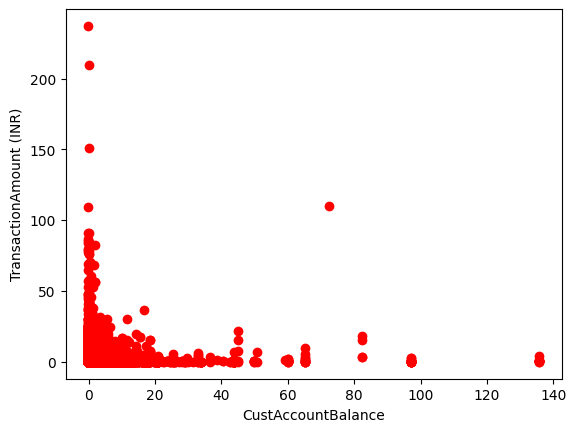

In [17]:
# Comenzamos seleccionando las variables que nos interesan.
X = data[["CustAccountBalance", "TransactionAmount (INR)"]]

# Se grafican los puntos
plt.scatter(X["CustAccountBalance"], X["TransactionAmount (INR)"], c='red')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()

In [29]:
# Definir la función de distancia euclidiana
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Implementar el método del codo para K-Means Clustering
def kmeans_elbow_method(X, k):
    # Inicializar los centroides de manera aleatoria
    centroids = X.iloc[np.random.choice(X.shape[0], size=k, replace=False), :]
    
    # Iterar sobre diferentes valores de k y calcular SSE
    sse = []
    for i in range(1, k+1):
        clusters = [[] for _ in range(i)]
        for x in X:
            distances = [euclidean_distance(x, c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(x)
        curr_sse = 0
        for j in range(i):
            cluster = np.array(clusters[j])
            centroid = np.mean(cluster, axis=0)
            curr_sse += np.sum((cluster - centroid) ** 2)
        sse.append(curr_sse)
    
    # Graficar SSE vs k y encontrar el codo
    import matplotlib.pyplot as plt
    plt.plot(range(1, k+1), sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('Método del codo para K-Means Clustering')
    plt.show()

In [35]:

X = data[['CustAccountBalance', 'TransactionAmount (INR)']]
#kmeans_elbow_method(X, k=3)
X.info()

,CustAccountBalance,TransactionAmount (INR)
5871,36.616579,0.217239
8392,43.849292,7.111934
12317,60.077366,0.141139
35121,33.709244,-0.230231
38173,32.898268,2.500251
...,...,...
1032023,96.967326,0.126124
1034359,96.967326,2.652452
1037039,32.898268,1.409884
1037362,32.898268,3.594731


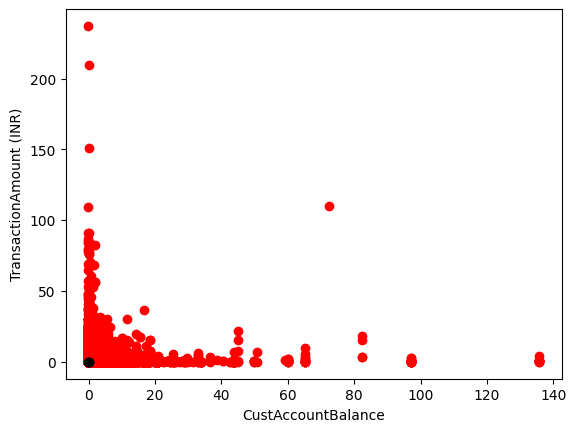

In [18]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["CustAccountBalance"], X["TransactionAmount (INR)"], c='red')
plt.scatter(Centroids["CustAccountBalance"], Centroids["TransactionAmount (INR)"], c='black')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()

In [19]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["CustAccountBalance"]-row_d["CustAccountBalance"])**2
            d2=(row_c["TransactionAmount (INR)"]-row_d["TransactionAmount (INR)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["TransactionAmount (INR)","CustAccountBalance"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['TransactionAmount (INR)'] - Centroids['TransactionAmount (INR)']).sum() + (Centroids_new['CustAccountBalance'] - Centroids['CustAccountBalance']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["TransactionAmount (INR)","CustAccountBalance"]]

/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_92417/3149168905.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_92417/3149168905.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


1.6053705011100332
2.167013276773421
2.7555186440899258
3.204178959863668
3.485662488774531
3.644090257414666
3.012858150976279
3.7289639753412738
5.5403117761928975
4.618812656381839
4.691658412654631
4.377834081685687
1.1431808220719684
1.4454844343304978
2.13440649770087
3.834226914720171
2.569520923810056
7.65347776608846
1.3288242638797525
3.7506864626460508
1.536562696572928
0.17404186871322108
0.34268251332181304
0.17219331092656498
0.0


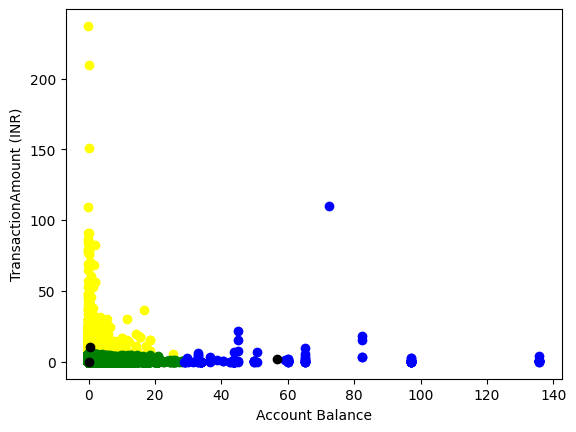

In [20]:
color=['yellow','green','blue']
for k in range(K):
    data=X[X["Cluster"] == k + 1]
    plt.scatter(data["CustAccountBalance"],data["TransactionAmount (INR)"], c=color[k])
plt.scatter(Centroids["CustAccountBalance"],Centroids["TransactionAmount (INR)"], c='black')
plt.xlabel('Account Balance')
plt.ylabel('TransactionAmount (INR)')
plt.show()